In [10]:
# code for ignore any warning messages
import warnings
warnings.filterwarnings('ignore')

In [11]:
# import the libraries and requrie modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# import the data from the dataset
rf = pd.read_csv("NSE_TATA.csv")
rf = rf.dropna()

# define columns in the dataset
rf = rf[['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity','Turnover (Lacs)']] 

# code to get first 5 rows
rf.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2022-04-22,818.0,821.60,803.10,811.60,815.60,1880668,15288.05349
1,2022-04-21,812.0,822.00,804.25,818.95,820.05,1344250,10958.17570
2,2022-04-20,800.0,813.45,792.10,810.10,810.45,1522453,12244.14776
3,2022-04-19,825.0,836.85,784.85,788.00,791.35,2460482,20063.01436
4,2022-04-18,816.2,824.90,809.00,822.50,822.30,1480954,12102.61050


In [13]:
rf.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1561.000000,1561.000000,1561.00000,1561.000000,1561.000000,1.561000e+03,1561.000000
mean,348.303972,353.312460,343.06230,348.047341,348.034177,3.187189e+06,11480.285301
std,222.923844,225.242387,219.99598,222.566091,222.600846,3.349989e+06,14159.640225
min,103.000000,104.600000,100.00000,102.600000,102.650000,1.758370e+05,388.735415
25%,171.800000,173.850000,169.00000,171.000000,171.150000,1.518494e+06,3202.778609
50%,265.950000,271.250000,262.00000,266.200000,266.600000,2.329094e+06,7762.714725
75%,511.000000,517.850000,502.10000,508.600000,509.100000,3.662455e+06,15107.108290
max,885.000000,889.000000,877.60000,880.200000,882.100000,6.355260e+07,234317.687900


In [14]:
# get the summary statistics of the numerical columns in the dataset
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1561 non-null   object 
 1   Open                  1561 non-null   float64
 2   High                  1561 non-null   float64
 3   Low                   1561 non-null   float64
 4   Last                  1561 non-null   float64
 5   Close                 1561 non-null   float64
 6   Total Trade Quantity  1561 non-null   int64  
 7   Turnover (Lacs)       1561 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 97.7+ KB


In [15]:
#import and set up Plotly, a data visualization library, for use in a Jupyter notebook environment.
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [17]:
# code to define a layout and create a line chart with th edates on the x-axis and stock prices of infosys on the y-axis 
layout = go.Layout(
    title='STOCK PRICE',
        xaxis=dict(
            title='Date',
            titlefont=dict(
                family='Arial',
                size=20,
                color='green'
            )
        ),
        yaxis=dict(
            title='Price',
            titlefont=dict(
                family='Arial',
                size=20,
                color='blue'
        )
    )
)
rf_DATA = [{'x':rf['Date'], 'y':rf['Close']}]
plot = go.Figure(data=df_DATA, layout=layout)

In [18]:
iplot(plot)

In [19]:
# code to calculate the differences between the opening and closing prices 
rf['Open-Close']= rf.Close - rf.Open

#code to calculate the differences between the high and low prices
rf['High-Low']  = rf.High - rf.Low
rf = rf.dropna()

# define the input features
X= rf[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,-2.40,18.50
1,8.05,17.75
2,10.45,21.35
3,-33.65,52.00
4,6.10,15.90


In [20]:
#code creates a binary target variable 'B' where it assigns 1 if the next day's closing price is higher than the current day's closing price and -1 if it is lower.

Y= np.where(df['Close'].shift(-1)>rf['Close'],1,-1)

In [21]:
# splitting the data into training and testing sets based on a given percentage 0.8
split_percentage = 0.8
split = int(split_percentage*len(rf))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [22]:
#Importing necessary modules for decision tree 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_value_score
from sklearn.metrics import accuracy_score

In [23]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_value_score(clf, X, Y, cv=10))

In [24]:
print(scores[0])

[0.84713376 0.82692308 0.8525641  0.88461538 0.82051282 0.8525641
 0.80769231 0.79487179 0.81410256 0.75      ]


In [25]:
print(scores[1])

[0.82802548 0.90384615 0.83974359 0.83333333 0.83333333 0.83974359
 0.80769231 0.80769231 0.76282051 0.72435897]


In [26]:
rfc = RandomForestClassifier(n_estimators=16)

In [27]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=16)

In [28]:
rfc_pred = rfc.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# generate the classification report
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

          -1       0.79      0.85      0.82       164
           1       0.82      0.75      0.79       149

    accuracy                           0.81       313
   macro avg       0.81      0.80      0.80       313
weighted avg       0.81      0.81      0.80       313



In [31]:
# confusion matrix
print(confusion_matrix(Y_test, rfc_pred))

[[140  24]
 [ 37 112]]


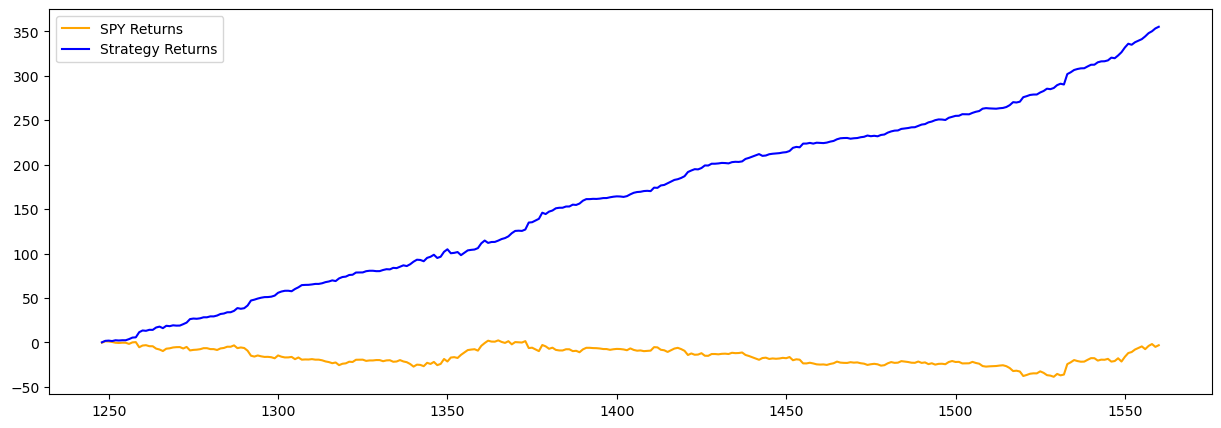

In [43]:
df['Predicted_Signal'] = rfc.predict(X)

df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = df[split:]['SPY_returns'].cumsum()*100
 
df['Startegy_returns'] = df['SPY_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(15,5))
plt.plot(Cumulative_SPY_returns, color='orange',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='blue', label = 'Strategy Returns')
plt.legend()
plt.show()

In [33]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print ('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 1.87


In [34]:
model = rfc.fit(X_train, Y_train)
model = rfc.fit (X_train,Y_train)

In [35]:
probability = model.predict_proba(X_test)
print(probability)

[[0.     1.    ]
 [0.875  0.125 ]
 [0.1875 0.8125]
 [1.     0.    ]
 [0.125  0.875 ]
 [0.4375 0.5625]
 [0.4375 0.5625]
 [1.     0.    ]
 [0.     1.    ]
 [0.     1.    ]
 [1.     0.    ]
 [0.     1.    ]
 [0.6875 0.3125]
 [1.     0.    ]
 [0.25   0.75  ]
 [0.8125 0.1875]
 [1.     0.    ]
 [0.125  0.875 ]
 [0.0625 0.9375]
 [1.     0.    ]
 [0.1875 0.8125]
 [0.8125 0.1875]
 [0.25   0.75  ]
 [1.     0.    ]
 [0.     1.    ]
 [0.9375 0.0625]
 [0.3125 0.6875]
 [0.625  0.375 ]
 [0.3125 0.6875]
 [0.     1.    ]
 [0.6875 0.3125]
 [0.9375 0.0625]
 [0.0625 0.9375]
 [1.     0.    ]
 [0.0625 0.9375]
 [0.25   0.75  ]
 [0.     1.    ]
 [0.875  0.125 ]
 [0.25   0.75  ]
 [1.     0.    ]
 [0.6875 0.3125]
 [0.8125 0.1875]
 [1.     0.    ]
 [1.     0.    ]
 [0.625  0.375 ]
 [0.     1.    ]
 [1.     0.    ]
 [1.     0.    ]
 [0.125  0.875 ]
 [0.9375 0.0625]
 [0.9375 0.0625]
 [0.     1.    ]
 [0.875  0.125 ]
 [0.9375 0.0625]
 [0.1875 0.8125]
 [0.6875 0.3125]
 [0.9375 0.0625]
 [0.     1.    ]
 [1.     0.   

In [36]:
predicted = rfc.predict(X_test)

In [37]:
from sklearn import metrics

In [38]:
print(metrics.confusion_matrix(Y_test, predicted))

[[137  27]
 [ 32 117]]


In [39]:
# generate the classification report
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.81      0.84      0.82       164
           1       0.81      0.79      0.80       149

    accuracy                           0.81       313
   macro avg       0.81      0.81      0.81       313
weighted avg       0.81      0.81      0.81       313



In [40]:
# model accuracy
print(model.score(X_train,Y_train))

0.9911858974358975
